# Parte 1: Preprocesamiento y Extracción de Características

In [ ]:
import json
import os
import math
import librosa
import matplotlib.pyplot as plt


# Configurar las credenciales de Kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el conjunto de datos de Kaggle
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

# Descomprimir el conjunto de datos descargado
!unzip gtzan-dataset-music-genre-classification.zip -d gtzan_dataset




Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
100% 1.21G/1.21G [00:16<00:00, 72.4MB/s]
100% 1.21G/1.21G [00:18<00:00, 71.0MB/s]
Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: gtzan_dataset/Data/features_30_sec.csv  
  inflating: gtzan_dataset/Data/features_3_sec.csv  
  inflating: gtzan_dataset/Data/genres_original/blues/blues.00000.wav  
  inflating: gtzan_dataset/Data/genres_original/blues/blues.00001.wav  
  inflating: gtzan_dataset/Data/genres_original/blues/blues.00002.wav  
  inflating: gtzan_dataset/Data/genres_original/blues/blues.00003.wav  
  inflating: gtzan_dataset/Data/genres_original/blues/blues.00004.wav  
  inflating: gtzan_dataset/Data/genres_original/blues/blues.00005.wav  
  inflating: gtzan_dataset/Data/genres_original/blues/blues.00006.wav  
  inflating: gtzan_dataset/Data/genres_original/blues/blues.00007.wav  
  inflating: gtzan_dataset/Data/genres_original/blues/blues.0

In [ ]:
import pandas as pd
csv_path = 'gtzan_dataset/Data/features_30_sec.csv'
df = pd.read_csv(csv_path)


In [ ]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


# Parte 2: Red Neuronal y Evaluación del Modelo

In [ ]:
import json
import numpy as np
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['filename','label'], axis=1).values
y = df['label'].values

In [ ]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convertir etiquetas a números utilizando LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (700, 58)
X_test shape: (300, 58)
y_train shape: (700,)
y_test shape: (300,)


In [ ]:


# Construir la topología del modelo
model = keras.Sequential([
    # Capa de entrada
    keras.layers.Dense(512, activation='relu', input_shape=(X.shape[1],)),


    # 1ra capa densa
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),

    # 2da capa densa
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),

    # 3ra capa densa
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),

    # Capa de salida, 10 categorías (número de géneros)
    keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1

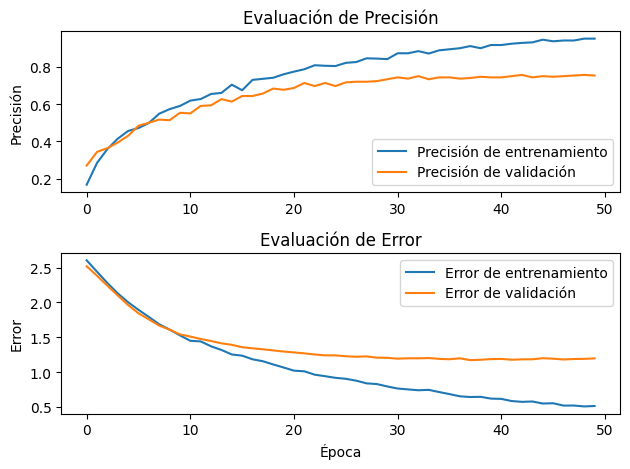

In [ ]:
# Graficar la precisión y el error a través de las épocas
fig, axs = plt.subplots(2)

# Precisión
axs[0].plot(history.history["accuracy"], label="Precisión de entrenamiento")
axs[0].plot(history.history["val_accuracy"], label="Precisión de validación")
axs[0].set_ylabel("Precisión")
axs[0].legend(loc="lower right")
axs[0].set_title("Evaluación de Precisión")

# Error
axs[1].plot(history.history["loss"], label="Error de entrenamiento")
axs[1].plot(history.history["val_loss"], label="Error de validación")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Época")
axs[1].legend(loc="upper right")
axs[1].set_title("Evaluación de Error")

plt.tight_layout()
plt.show()

In [ ]:
# Evaluar el modelo en los datos de prueba
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 1.1959 - accuracy: 0.7533


[1.1958898305892944, 0.753333330154419]

In [ ]:
X_test.shape

(300, 58)

In [ ]:
import IPython.display as ipd
import numpy as np

# Seleccionar un ejemplo de los datos de prueba
example_index = 67

# Obtener las características del ejemplo seleccionado
example_features = X_test[example_index].reshape(1, -1)

# Realizar la predicción con el modelo
predictions = model.predict(example_features)

# Decodificar la predicción a la etiqueta original
predicted_label = label_encoder.inverse_transform(np.argmax(predictions, axis=-1))

# Obtener la etiqueta real
true_label = label_encoder.inverse_transform([y_test[example_index]])

print(f"Ejemplo seleccionado: {example_index}")
print(f"Etiqueta real: {true_label[0]}")
print(f"Predicción del modelo: {predicted_label[0]}")


# # Construir la ruta al archivo de audio predicho
# predicted_audio_path = f"/content/gtzan_dataset/Data/genres_original/{true_label[0]}/{true_label[0]}.00009.wav"

# # Reproducir el audio del ejemplo predicho
# print(f"Reproduciendo el audio del ejemplo predicho...")
# ipd.Audio(predicted_audio_path)


1/1 [==============================] - 0s 128ms/step
Ejemplo seleccionado: 67
Etiqueta real: rock
Predicción del modelo: disco
